# pc_curve

This single method can convert either (a) images containing invasion size or (b) invasion pressure results, such as those produced by porosimetry and drainage, respectively.

In [1]:
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt

import openpnm as op
%config InlineBackend.figure_formats = ['svg']
import openpnm.models as mods
%matplotlib inline
np.random.seed(10)
import os
import imageio
import scipy as sp
np.set_printoptions(precision=4)
%matplotlib inline

c:\Users\kOUKA\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\kOUKA\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\kOUKA\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [2]:
path = "..\data_tomography\data\Berea_sandstone"
file_format = '.tif'
file_name = 'Berea_sandstone'
file = file_name + file_format
fetch_file = os.path.join(path, file)
file = "Berea_sandstone.tif"
im = imageio.mimread(fetch_file)
im_org =im.copy()
im = ~np.array(im, dtype=bool)[:250, :250, :250]  # Make image a bit smaller

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kOUKA\AppData\Local\Temp\ipykernel_9608\799676005.py:1: SyntaxWarning: invalid escape sequence '\d'
  path = "..\data_tomography\data\Berea_sandstone"


In [ ]:
drainage = ps.filters.porosimetry(im)


  0%|          | 0/25 [00:00<?, ?it/s]

##  sizes

The porosimetry function returns an image indicating the radius of the capillary meniscus that at which is was invaded. In this case the Washburn equation is used to convert sizes to capillary pressures, surface tension (sigma) and contact (theta) must be provided, as well as voxel size (voxel_size) if the sizes array is in units of voxels.

  0%|          | 0/20 [00:00<?, ?it/s]

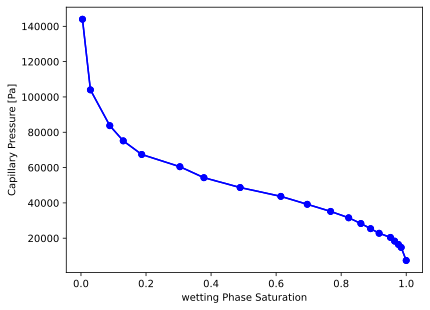

In [6]:
data = ps.metrics.pc_curve(im=im,sizes=drainage,voxel_size=1.e-6)
swp = 1 - np.asarray(data.snwp)
plt.plot(swp,data.pc, 'b-o')
plt.ylabel('Capillary Pressure [Pa]')
plt.xlabel('wetting Phase Saturation');
plt.show()

In [5]:
print(data)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Results of pc_curve generated at Wed Oct 29 13:54:00 2025
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
pc                        [7388.413754996114, 14776.827509992228, 16468.954400930677, 18354.850449227215, 20456.7045855964, 22799.24664381995, 25410.038325123554, 28319.797481521855, 31562.759533559725, 35177.080274790904, 39205.28480227987, 43694.76785511909, 48698.351447805886, 54274.90635943909, 60490.044791005006, 67416.89234036674, 75136.9483778008, 83741.04494502112, 104017.88580048777, 144000.0]
snwp                      [0.0, 0.015439240905294251, 0.024014020919844024, 0.03564914114346692, 0.04850520176376855, 0.0832883744041767, 0.10954877526864135, 0.1394469331117657, 0.17694894608124187, 0.2324777664779958, 0.3042889251902217, 0.38557372919748784, 0.5105996549911304, 0.622004435112203, 0.6958868375920562, 0.813243741309768, 0.8700332915387609, 0.9114227636927353,

##  sizes

The porosimetry function returns an image indicating the radius of the capillary meniscus that at which is was invaded. In this case the Washburn equation is used to convert sizes to capillary pressures, surface tension (sigma) and contact (theta) must be provided, as well as voxel size (voxel_size) if the sizes array is in units of voxels.

In [7]:
data = ps.metrics.pc_curve(im=im, sizes=drainage, voxel_size=1e-5)

  0%|          | 0/20 [00:00<?, ?it/s]

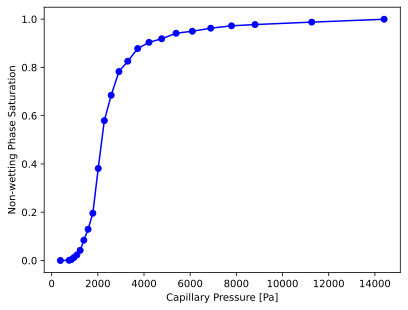

In [11]:
plt.plot(data.pc, data.snwp, 'b-o')
plt.xlabel('Capillary Pressure [Pa]')
plt.ylabel('Non-wetting Phase Saturation');

The function results a Results object, whose attributes can be inspected by printing:

In [8]:
print(data)


――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Results of pc_curve generated at Wed Oct 29 13:55:57 2025
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
pc                        [738.8413754996113, 1477.6827509992227, 1646.8954400930677, 1835.4850449227217, 2045.6704585596397, 2279.9246643819947, 2541.003832512355, 2831.979748152185, 3156.2759533559724, 3517.7080274790906, 3920.528480227987, 4369.476785511908, 4869.835144780588, 5427.490635943908, 6049.0044791005, 6741.689234036673, 7513.694837780079, 8374.10449450211, 10401.788580048777, 14399.999999999998]
snwp                      [0.0, 0.015439240905294251, 0.024014020919844024, 0.03564914114346692, 0.04850520176376855, 0.0832883744041767, 0.10954877526864135, 0.1394469331117657, 0.17694894608124187, 0.2324777664779958, 0.3042889251902217, 0.38557372919748784, 0.5105996549911304, 0.622004435112203, 0.6958868375920562, 0.813243741309768, 0.8700332915387609, 0.9114227636

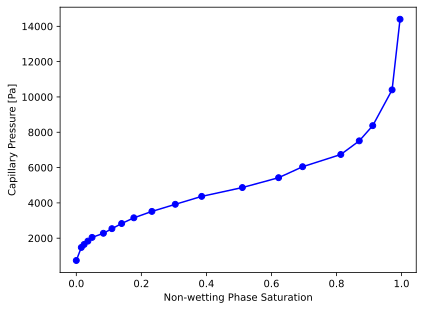

In [12]:

plt.plot(data.snwp,data.pc,  'b-o')
plt.ylabel('Capillary Pressure [Pa]')
plt.xlabel('Non-wetting Phase Saturation');

plt.show()
